Assignment No.1:k-nearest neighbors


Before running this block, make sure to upload "data.mat" in the google drive.

In [1]:
#Enter your path of dataset from google drive
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/KNN_Assignment/"

dataset = path + "data.mat"

#Enter path of your test image
test_image=path+"test.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Mounted at /content/drive/


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [2]:
import numpy as np
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(32, 32, 3)


(32, 32, 3)

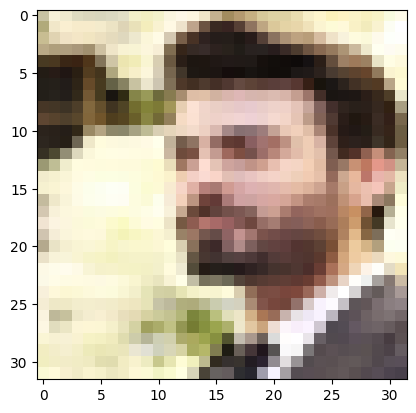

In [3]:
from matplotlib import pyplot as plt
#import cv2

plt.imshow(im[:,:,:,40])
print(im[:,:,:,0].shape)
a= im[:,:,:,40]
plt.imshow(a)
a.shape

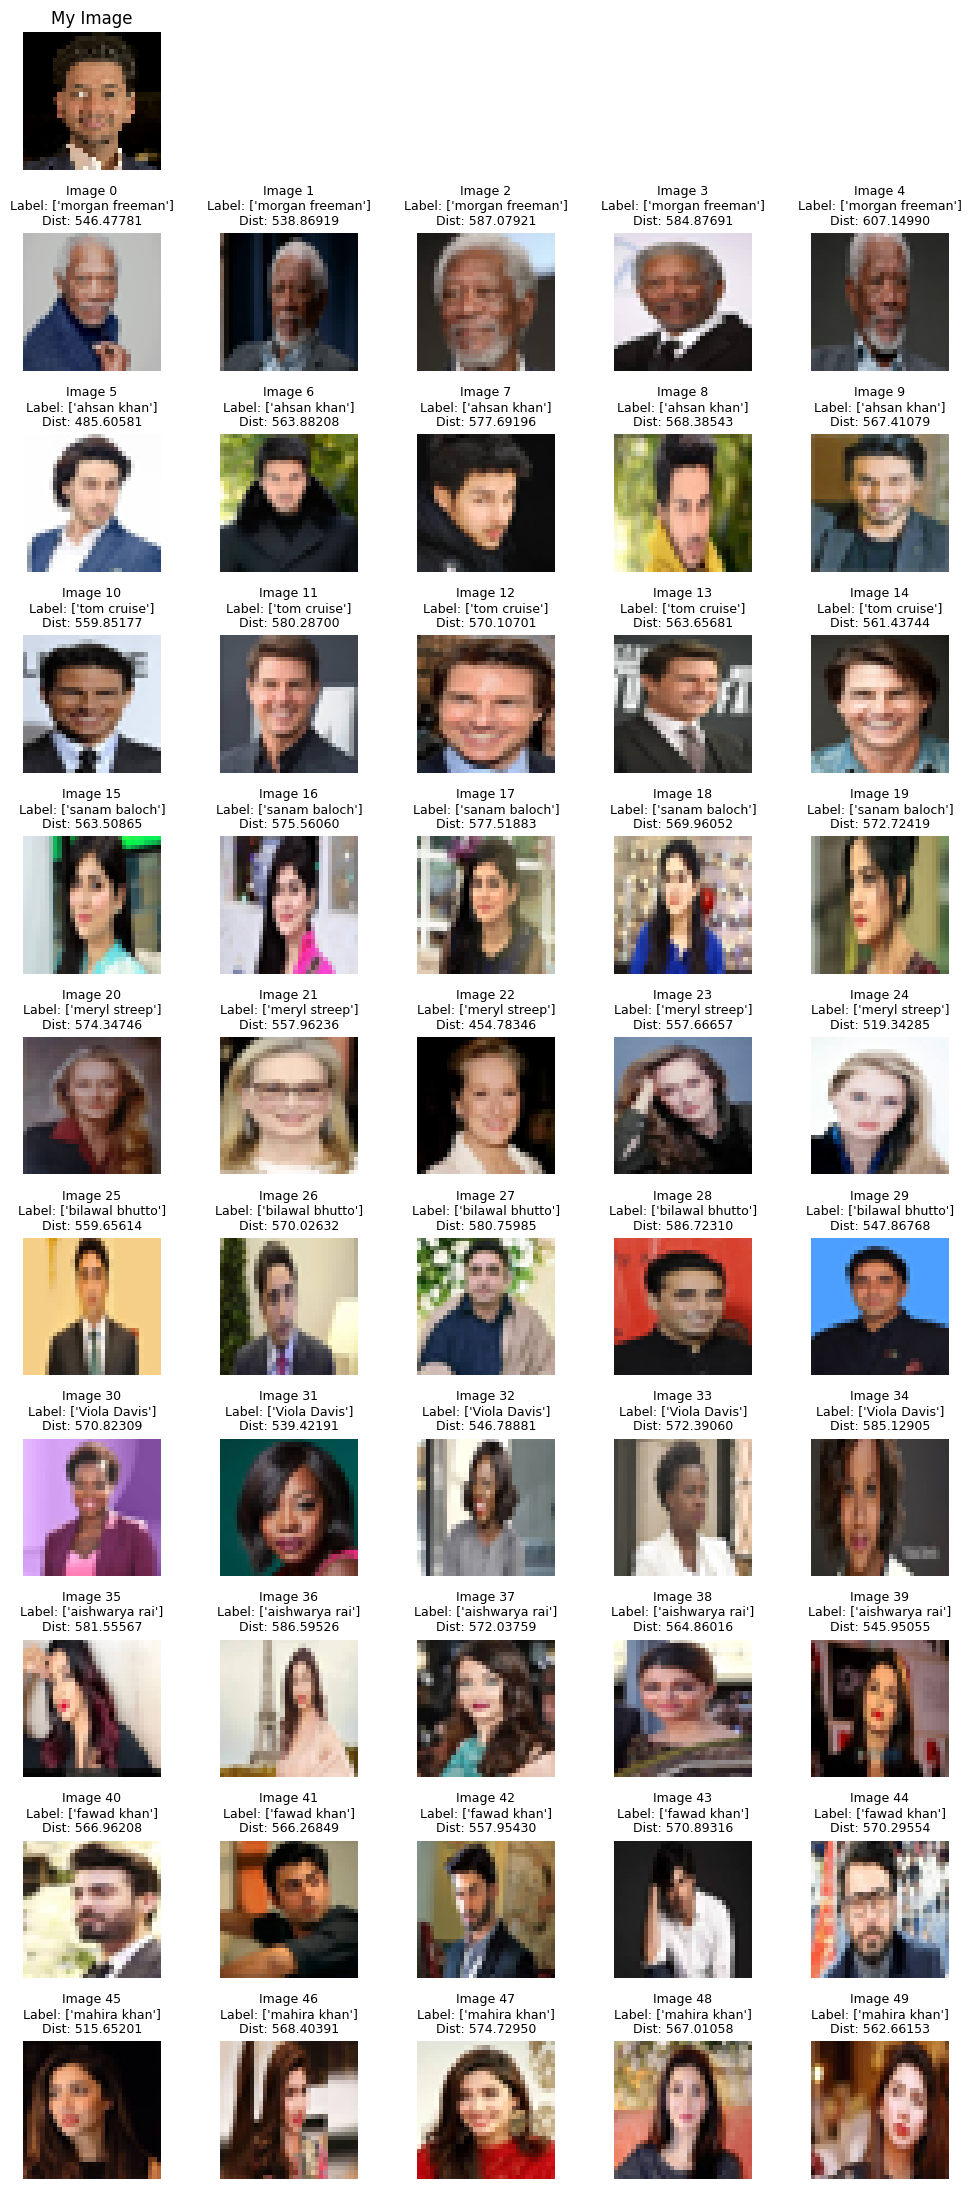

In [5]:
import cv2
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load the dataset from 'data.mat'
data = loadmat('/content/drive/MyDrive/KNN_Assignment/data.mat')

# Extract the image data (shape: 3072x50) and labels
images = data['images']  # Dataset with images
y = data['C']  # Labels for the images

# Convert labels to a list of strings
labels = [str(label[0]) for label in y]

# Reshape the image data to the shape (32, 32, 3, 50)
images = np.transpose(images)  # Transpose to get the correct shape
im = np.reshape(images, (32, 32, 3, -1), order="F")

# Read your image here
img_path = '/content/drive/MyDrive/KNN_Assignment/my_image.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Resize your image to 32x32
img_resized = cv2.resize(img_rgb, (32, 32))

# Reshape your image to match the dataset format
img_reshaped = img_resized.reshape(-1, order="F")

# Define the Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Create a grid for displaying images
num_rows = (50 // 5) + 1
plt.figure(figsize=(10, 2 * (num_rows + 1)))

# Display my image in the first row
plt.subplot(num_rows + 1, 5, 1)
plt.imshow(img_resized)
plt.title("My Image")
plt.axis('off')  # Hide axes

# Display all  images and calculate distances
for i in range(50):
    dataset_image = im[:, :, :, i]
    plt.subplot(num_rows + 1, 5, i + 6)  # Start from the second row
    plt.imshow(dataset_image)

    # Calculate the Euclidean distance
    G = dataset_image.reshape(-1, order="F")
    distance = euclidean_distance(img_reshaped, G)

    # Display title with distance
    plt.title(f"Image {i}\nLabel: {labels[i]}\nDist: {distance:.5f}", fontsize=9)
    plt.axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout
plt.show()


1knn

Minimum distance: 454.7834649588747
Index of nearest neighbor: 22


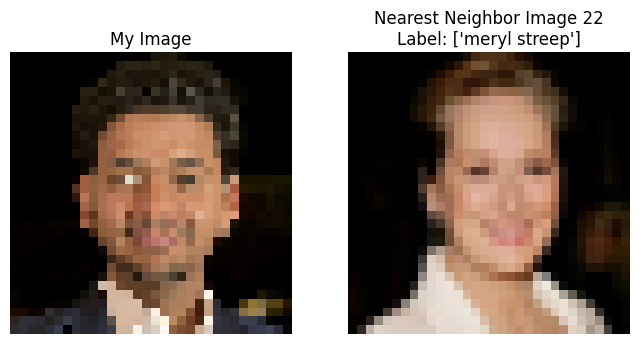

In [6]:
import cv2
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load the dataset from 'data.mat'
data = loadmat('/content/drive/MyDrive/KNN_Assignment/data.mat')

# Extract the image data (shape: 3072x50) and labels
images = data['images']  # Dataset with images
y = data['C']  # Labels for the images

labels = [str(label[0]) for label in y]

# Reshape the image data to the shape (32, 32, 3, 50)
images = np.transpose(images)  # Transpose to get the correct shape
im = np.reshape(images, (32, 32, 3, -1), order="F")  # Reshape to 32x32x3

# Read your image here
img_path = '/content/drive/MyDrive/KNN_Assignment/my_image.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Resize your image to 32x32
img_resized = cv2.resize(img_rgb, (32, 32))

# Reshape your image
img_reshaped = img_resized.reshape(-1, order="F")

# Initialize variables to track the minimum distance and index
min_distance = float('inf')
min_index = -1

# Loop through the dataset to calculate distances
for i in range(50):
    G = im[:, :, :, i].reshape(-1, order="F")
    distance = np.sqrt(np.sum((img_reshaped - G) ** 2))  # Calculate distance

    # Check if the current distance is the minimum found so far
    if distance < min_distance:
        min_distance = distance
        min_index = i

# Print the results
display(HTML('<b>1 Nearest Distance from dataset image</b>'))
print(f'Minimum distance: {min_distance}')
print(f'Index of nearest neighbor: {min_index}')

# Display the images side by side
plt.figure(figsize=(8, 4))

# Display my image
plt.subplot(1, 2, 1)
plt.imshow(img_resized)
plt.title("My Image")
plt.axis('off')  # Hide axes

# Display the nearest neighbor image
plt.subplot(1, 2, 2)
nearest_neighbor_image = im[:, :, :, min_index]
plt.imshow(nearest_neighbor_image)
plt.title(f"Nearest Neighbor Image {min_index}\nLabel: {labels[min_index]}")
plt.axis('off')  # Hide axes

plt.show()


3knn

Distance from dataset image 22: 454.7834649588747
Distance from dataset image 5: 485.6058072140406
Distance from dataset image 45: 515.6520144438496


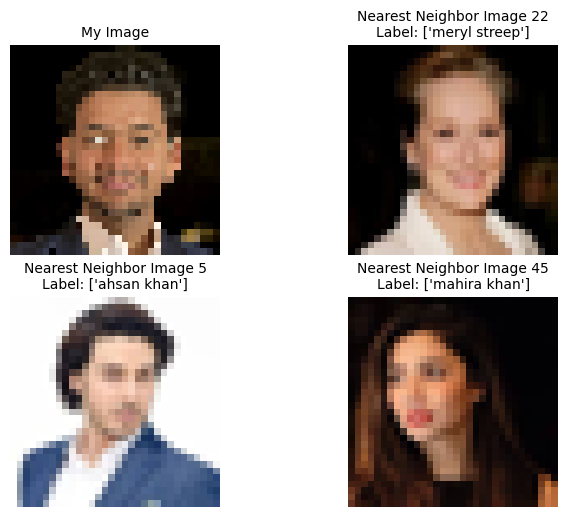

In [ ]:
import cv2
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load the dataset from 'data.mat'
data = loadmat('/content/drive/MyDrive/KNN_Assignment/data.mat')

# Extract the image data (shape: 3072x50) and labels
images = data['images']  # Dataset with images
y = data['C']  # Labels for the images

# Reshape the image data to the shape (32, 32, 3, 50)
images = np.transpose(images)  # Transpose to get the correct shape
im = np.reshape(images, (32, 32, 3, -1), order="F")  # Reshape to 32x32x3 for each image

# Read your image here
img_path = '/content/drive/MyDrive/KNN_Assignment/my_image.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Resize your image to 32x32
img_resized = cv2.resize(img_rgb, (32, 32))

# Reshape your image to (3072,) to match the dataset's format
img_reshaped = img_resized.reshape(-1, order="F")

# Initialize a list to hold distances
distances = []

# Calculate distances for all dataset images
for i in range(50):
    G = im[:, :, :, i].reshape(-1, order="F")  # Reshape dataset image
    distance = np.sqrt(np.sum((img_reshaped - G) ** 2))  # Calculate distance
    distances.append((distance, i))  # Store distance and index

# Sort distances and select the indices of the 3 nearest neighbors
distances.sort(key=lambda x: x[0])  # Sort by distance
nearest_neighbors = distances[:3]  # Get the closest 3

# Print the results
display(HTML('<b>3 Nearest Distance from dataset image</b>'))
for dist, idx in nearest_neighbors:
    print(f'Distance from dataset image {idx}: {dist}')

# Display your image alongside the nearest neighbors
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(img_resized)
plt.title("My Image",fontsize=10)
plt.axis('off')  # Hide axes

# Display the nearest neighbor images
for j in range(3):
    idx = nearest_neighbors[j][1]
    nearest_neighbor_image = im[:, :, :, idx]
    plt.subplot(2, 2, j + 2)
    plt.imshow(nearest_neighbor_image)
    plt.title(f"Nearest Neighbor Image {idx}\nLabel: {labels[idx]}", fontsize=10)
    plt.axis('off')  # Hide axes

plt.show()


5knn

Distance from dataset image 22: 454.7834649588747
Distance from dataset image 5: 485.6058072140406
Distance from dataset image 45: 515.6520144438496
Distance from dataset image 24: 519.3428539991669
Distance from dataset image 1: 538.8691863523095


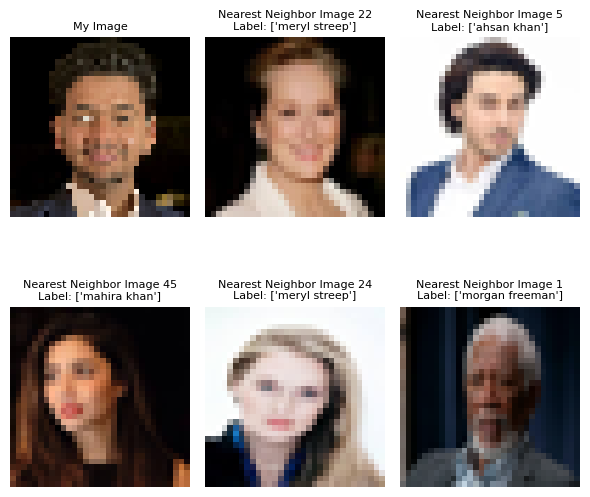

In [ ]:
import cv2
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from IPython.display import display, HTML


# Load the dataset from 'data.mat'
data = loadmat('/content/drive/MyDrive/KNN_Assignment/data.mat')

# Extract the image data (shape: 3072x50) and labels
images = data['images']
y = data['C']

# Reshape the image
images = np.transpose(images)
im = np.reshape(images, (32, 32, 3, -1), order="F")

# Read image here
img_path = '/content/drive/MyDrive/KNN_Assignment/my_image.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Resize  image to 32x32
img_resized = cv2.resize(img_rgb, (32, 32))

# Reshape  image to match the dataset's format
img_reshaped = img_resized.reshape(-1, order="F")

# Initialize a list to hold distances
distances = []

# Calculate distances for all dataset images
for i in range(50):
    G = im[:, :, :, i].reshape(-1, order="F")  # Reshape dataset image
    distance = np.sqrt(np.sum((img_reshaped - G) ** 2))  # Calculate distance
    distances.append((distance, i))  # Store distance and index

# Sort distances and select the indices of the 5 nearest neighbors
distances.sort(key=lambda x: x[0])  # Sort by distance
nearest_neighbors = distances[:5]  # Get the closest 5

# Print the results
display(HTML('<b>5 Nearest Distance from dataset image</b>'))
for dist, idx in nearest_neighbors:
    print(f'Distance from dataset image {idx}: {dist}')

# Display my image
plt.figure(figsize=(6, 6))

# Display your image in the first position
plt.subplot(2, 3, 1)
plt.imshow(img_resized)
plt.title("My Image", fontsize=8)
plt.axis('off')  # Hide axes

# Display the 5 nearest neighbor images
for j in range(5):
    idx = nearest_neighbors[j][1]
    nearest_neighbor_image = im[:, :, :, idx]
    plt.subplot(2, 3, j + 2)  # Place images in the next 5 subplots
    plt.imshow(nearest_neighbor_image)
    plt.title(f"Nearest Neighbor Image {idx}\nLabel: {labels[idx]}", fontsize=8)
    plt.axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
from IPython.display import display, HTML
display(HTML('<b>1 Nearest Distance from dataset image</b>'))